In [26]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('house_price.csv')

In [5]:
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3,63.25,3,4828
9,other,6 Bedroom,1020.0,6,370.00,6,36274


# Q1

In [10]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (13200, 7)


In [14]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [24]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

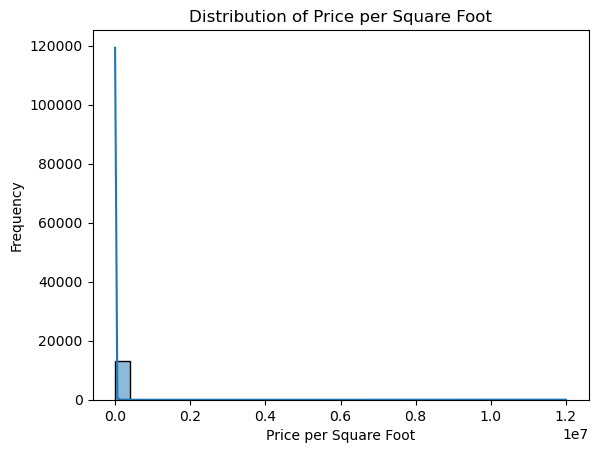

In [28]:
sb.histplot(df['price_per_sqft'], bins=30, kde=True)
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

# Q2

In [31]:
# Mean and Standard Deviation

In [33]:
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()
cut_off = std_dev * 3
lower_limit = mean - cut_off
upper_limit = mean + cut_off

In [35]:
print('Mean: ', mean, 'Standard Deviation: ', std_dev, 'Cut off: ', cut_off)
print('Lower limit:', lower_limit, 'Upper limit: ', upper_limit)

Mean:  7920.336742424242 Standard Deviation:  106727.16032810845 Cut off:  320181.48098432535
Lower limit: -312261.1442419011 Upper limit:  328101.8177267496


In [37]:
df_mean_std = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]

In [43]:
df_mean_std.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13195.000000,13195.00000,13195.000000,13195.000000,13195.000000
mean,1555.884482,2.69064,112.267415,2.800152,6713.708602
std,1237.196807,1.33853,149.200669,1.292344,4876.727718
min,15.000000,1.00000,8.000000,1.000000,267.000000
25%,1100.000000,2.00000,50.000000,2.000000,4266.500000
50%,1275.000000,2.00000,71.740000,3.000000,5434.000000
75%,1672.500000,3.00000,120.000000,3.000000,7313.000000
max,52272.000000,40.00000,3600.000000,43.000000,200000.000000


In [45]:
# Percentile Method

In [47]:
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

In [49]:
print('Lower percentile:', lower_percentile)
print('Upper percentile:', upper_percentile)

Lower percentile: 3107.8500000000004
Upper percentile: 15312.099999999984


In [51]:
df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

In [53]:
df_percentile.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000
mean,1526.834734,2.631397,98.746204,2.732660,6134.521380
std,900.548874,1.172290,88.614835,1.109424,2505.693062
min,276.000000,1.000000,13.500000,1.000000,3108.000000
25%,1108.000000,2.000000,51.180000,2.000000,4380.000000
50%,1290.000000,2.000000,71.000000,3.000000,5438.000000
75%,1670.000000,3.000000,111.000000,3.000000,7024.500000
max,30400.000000,16.000000,2100.000000,16.000000,15311.000000


In [55]:
#  IQR Method

In [59]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

In [61]:
lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR

In [65]:
print('IQR: ', IQR)
print('Lower IQR: ', lower_iqr)
print('Upper IQR: ', upper_iqr)

IQR:  3050.0
Lower IQR:  -308.0
Upper IQR:  11892.0


In [69]:
df_iqr = df[(df['price_per_sqft'] >= lower_iqr) & (df['price_per_sqft'] <= upper_iqr)]

In [71]:
df_iqr.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11935.000000,11935.000000,11935.000000,11935.000000,11935.000000
mean,1514.629659,2.533641,87.654926,2.644826,5575.925513
std,1195.959790,1.111145,73.154677,1.051124,1957.779783
min,276.000000,1.000000,8.000000,1.000000,267.000000
25%,1100.000000,2.000000,48.000000,2.000000,4166.000000
50%,1270.000000,2.000000,66.780000,2.000000,5188.000000
75%,1634.500000,3.000000,100.000000,3.000000,6603.000000
max,52272.000000,27.000000,2100.000000,27.000000,11875.000000


In [73]:
# Z Score Method

In [75]:
from scipy import stats

In [79]:
z_scores = np.abs(stats.zscore(df['price_per_sqft']))

In [83]:
print('Z score:', z_scores)

Z score: 0        0.039554
1        0.030971
2        0.033876
3        0.015698
4        0.034391
           ...   
13195    0.011538
13196    0.029897
13197    0.024946
13198    0.023300
13199    0.045260
Name: price_per_sqft, Length: 13200, dtype: float64


In [81]:
df_z_score = df[(z_scores < 3)]

In [85]:
df_z_score.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13195.000000,13195.00000,13195.000000,13195.000000,13195.000000
mean,1555.884482,2.69064,112.267415,2.800152,6713.708602
std,1237.196807,1.33853,149.200669,1.292344,4876.727718
min,15.000000,1.00000,8.000000,1.000000,267.000000
25%,1100.000000,2.00000,50.000000,2.000000,4266.500000
50%,1275.000000,2.00000,71.740000,3.000000,5434.000000
75%,1672.500000,3.00000,120.000000,3.000000,7313.000000
max,52272.000000,40.00000,3600.000000,43.000000,200000.000000


# Q3

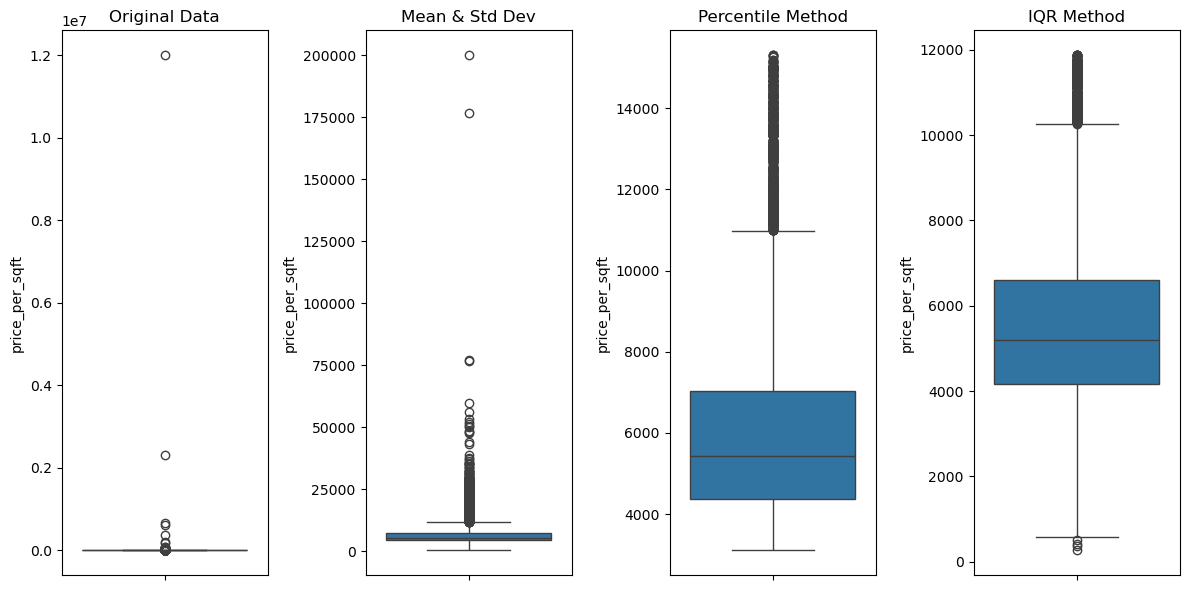

In [88]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
sns.boxplot(y=df['price_per_sqft'])
plt.title('Original Data')

plt.subplot(1, 4, 2)
sns.boxplot(y=df_mean_std['price_per_sqft'])
plt.title('Mean & Std Dev')

plt.subplot(1, 4, 3)
sns.boxplot(y=df_percentile['price_per_sqft'])
plt.title('Percentile Method')

plt.subplot(1, 4, 4)
sns.boxplot(y=df_iqr['price_per_sqft'])
plt.title('IQR Method')

plt.tight_layout()
plt.show()

# Q4

In [91]:
from scipy.stats import skew, kurtosis

In [95]:
print("Skewness before:", skew(df['price_per_sqft']))
print("Kurtosis before:", kurtosis(df['price_per_sqft']))

Skewness before: 108.26875024325159
Kurtosis before: 12090.633538860382


In [97]:
df['log_price_per_sqft'] = np.log(df['price_per_sqft'])

In [99]:
print("Skewness after:", skew(df['log_price_per_sqft']))
print("Kurtosis after:", kurtosis(df['log_price_per_sqft']))

Skewness after: 1.3997035748119977
Kurtosis after: 9.199636085376468


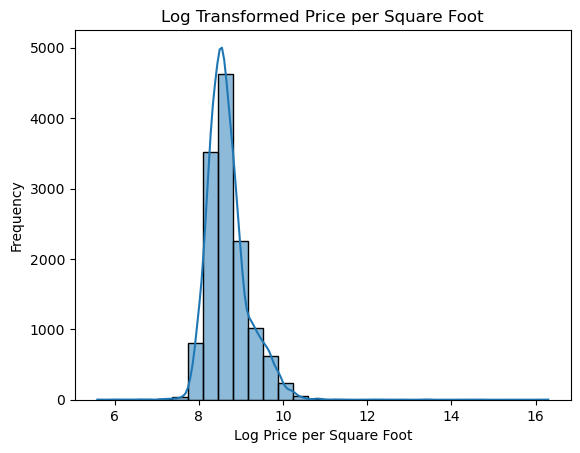

In [101]:
sb.histplot(df['log_price_per_sqft'], bins=30, kde=True)
plt.title('Log Transformed Price per Square Foot')
plt.xlabel('Log Price per Square Foot')
plt.ylabel('Frequency')
plt.show()